<a href="https://colab.research.google.com/github/minjepark/TIL/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89%ED%8A%9C%ED%86%A0%EB%A6%AC%EC%96%BC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
plt.style.use('seaborn')
sns.set(font_scale=2.5)
import missingno as msno
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
df_train = pd.read_csv('titanic_train.csv')
df_test = pd.read_csv('titanic_test.csv')

In [7]:
df_train.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [8]:
df_train.describe()

,passenger_id,pclass,age,sibsp,parch,fare,body,survived
count,850.000000,850.00000,676.000000,850.000000,850.000000,849.000000,73.000000,850.000000
mean,662.816471,2.32000,29.519847,0.522353,0.382353,34.012701,165.821918,0.368235
std,380.751936,0.83853,14.562243,1.112132,0.879511,53.705779,99.068487,0.482610
min,1.000000,1.00000,0.166700,0.000000,0.000000,0.000000,4.000000,0.000000
25%,332.250000,2.00000,20.000000,0.000000,0.000000,7.895800,75.000000,0.000000
50%,676.500000,3.00000,28.000000,0.000000,0.000000,14.108300,166.000000,0.000000
75%,992.250000,3.00000,37.000000,1.000000,0.000000,31.000000,260.000000,1.000000
max,1307.000000,3.00000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [9]:
df_test.describe()

,passenger_id,pclass,age,sibsp,parch,fare,body
count,459.000000,459.000000,370.000000,459.000000,459.000000,459.000000,48.000000
mean,637.673203,2.248366,30.541216,0.455338,0.389978,31.968854,153.187500
std,372.769720,0.835467,14.133361,0.896176,0.840038,47.977896,96.104034
min,0.000000,1.000000,0.333300,0.000000,0.000000,0.000000,1.000000
25%,317.000000,1.000000,21.250000,0.000000,0.000000,7.925000,69.250000
50%,612.000000,3.000000,29.000000,0.000000,0.000000,14.500000,142.500000
75%,960.000000,3.000000,40.000000,1.000000,0.000000,31.387500,250.500000
max,1308.000000,3.000000,71.000000,8.000000,6.000000,512.329200,322.000000


In [10]:
for col in df_train.columns:
  msg = 'column:{:>10}/t Percent of NaN value: {:.2f}%'.format(col, 100* (df_train[col].isnull().sum() / df_train[col].shape[0]))
  print(msg)

column:passenger_id/t Percent of NaN value: 0.00%
column:    pclass/t Percent of NaN value: 0.00%
column:      name/t Percent of NaN value: 0.00%
column:       sex/t Percent of NaN value: 0.00%
column:       age/t Percent of NaN value: 20.47%
column:     sibsp/t Percent of NaN value: 0.00%
column:     parch/t Percent of NaN value: 0.00%
column:    ticket/t Percent of NaN value: 0.00%
column:      fare/t Percent of NaN value: 0.12%
column:     cabin/t Percent of NaN value: 77.53%
column:  embarked/t Percent of NaN value: 0.12%
column:      boat/t Percent of NaN value: 63.76%
column:      body/t Percent of NaN value: 91.41%
column: home.dest/t Percent of NaN value: 45.41%
column:  survived/t Percent of NaN value: 0.00%


In [11]:
for col in df_test.columns:
  msg ='column: {:>10}/t Percent of NaN value: {:.2f}%'.format(col, 100* (df_test[col].isnull().sum() / df_test[col].shape[0]))
  print(msg)

column: passenger_id/t Percent of NaN value: 0.00%
column:     pclass/t Percent of NaN value: 0.00%
column:       name/t Percent of NaN value: 0.00%
column:        sex/t Percent of NaN value: 0.00%
column:        age/t Percent of NaN value: 19.39%
column:      sibsp/t Percent of NaN value: 0.00%
column:      parch/t Percent of NaN value: 0.00%
column:     ticket/t Percent of NaN value: 0.00%
column:       fare/t Percent of NaN value: 0.00%
column:      cabin/t Percent of NaN value: 77.34%
column:   embarked/t Percent of NaN value: 0.22%
column:       boat/t Percent of NaN value: 61.22%
column:       body/t Percent of NaN value: 89.54%
column:  home.dest/t Percent of NaN value: 38.78%


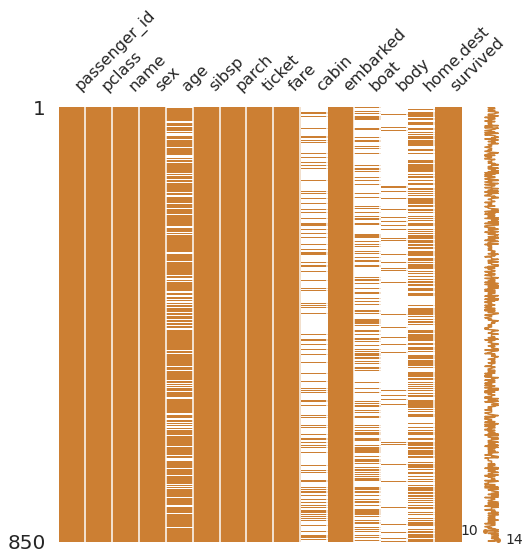

In [12]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8,8), color=(0.8, 0.5, 0.2))

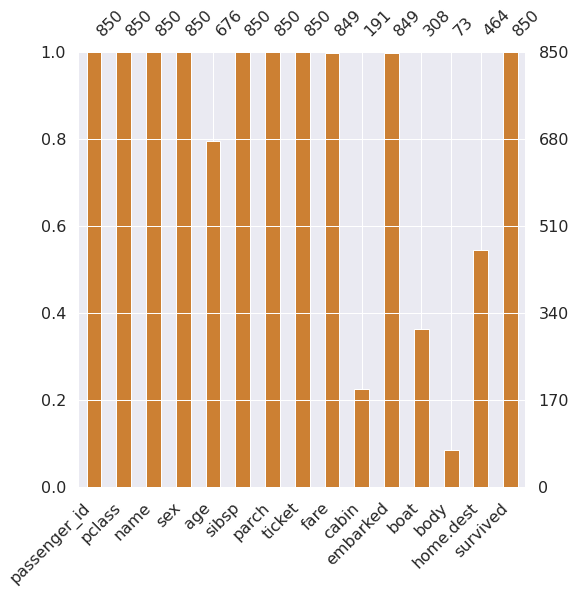

In [13]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))

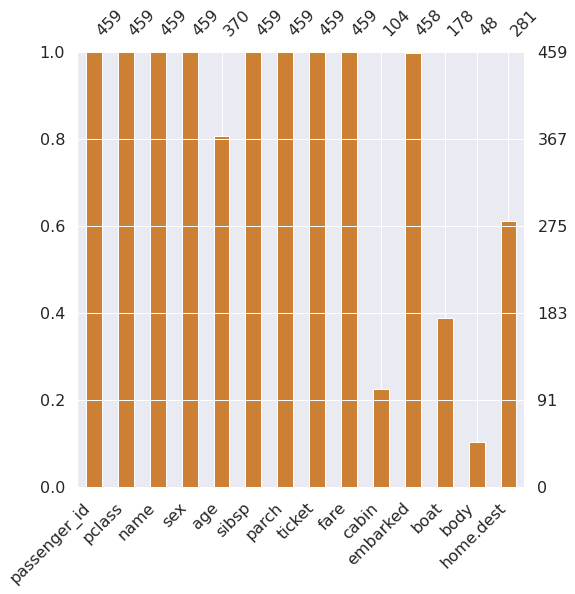

In [14]:
msno.bar(df=df_test.iloc[:,:], figsize=(8,8), color =(0.8, 0.5,0.2))

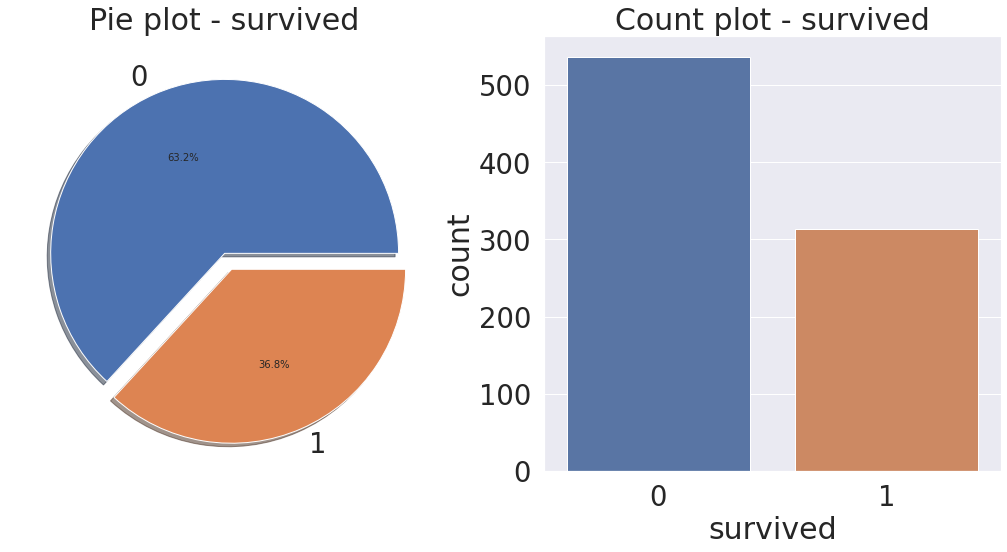

In [15]:
f, ax = plt.subplots(1,2,figsize=(18,8))

df_train['survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - survived')
ax[0].set_ylabel('')
sns.countplot('survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - survived')

plt.show()

In [16]:
df_train[['pclass','survived']].groupby(['pclass'], as_index=True).count()

,survived
pclass,
1,206
2,166
3,478


In [17]:
df_train[['pclass','survived']].groupby(['pclass'], as_index=True).sum()

,survived
pclass,
1,125
2,76
3,112


In [18]:
pd.crosstab(df_train['pclass'], df_train['survived'], margins=True).style.background_gradient(cmap='summer_r')

survived,0,1,All
pclass,,,
1,81,125,206
2,90,76,166
3,366,112,478
All,537,313,850


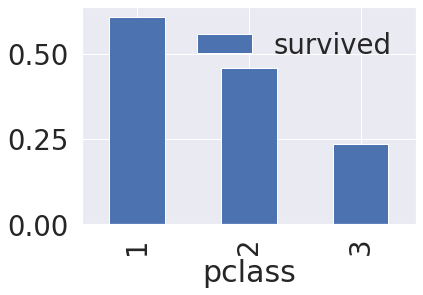

In [19]:
df_train[['pclass','survived']].groupby(['pclass'],as_index=True).mean().sort_values(by='survived',ascending=False).plot.bar()

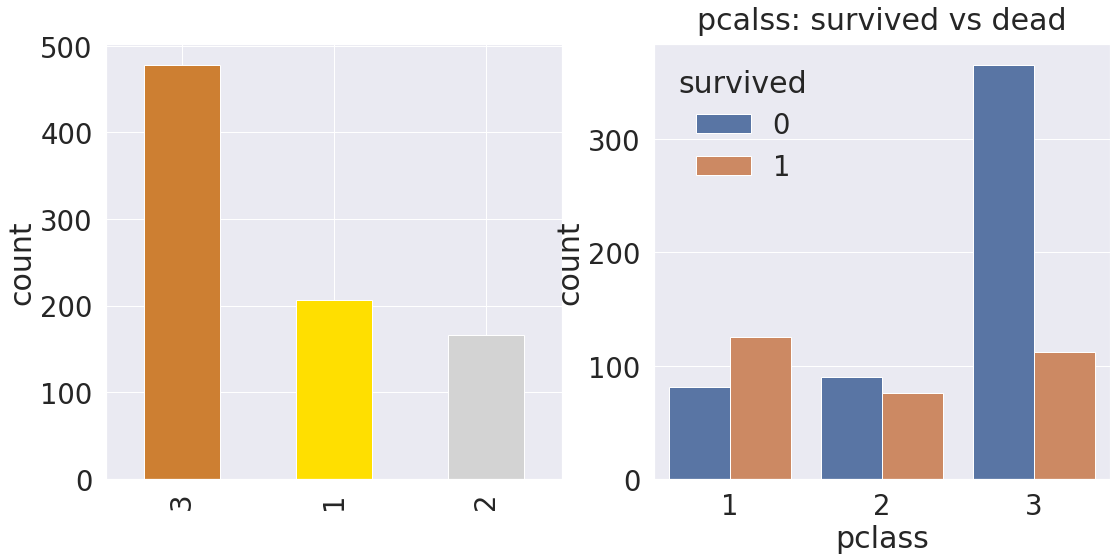

In [20]:
y_position = 1.02
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train['pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_ylabel('count')
sns.countplot('pclass', hue='survived', data=df_train, ax=ax[1])
ax[1].set_title('pcalss: survived vs dead', y=y_position)
plt.show()

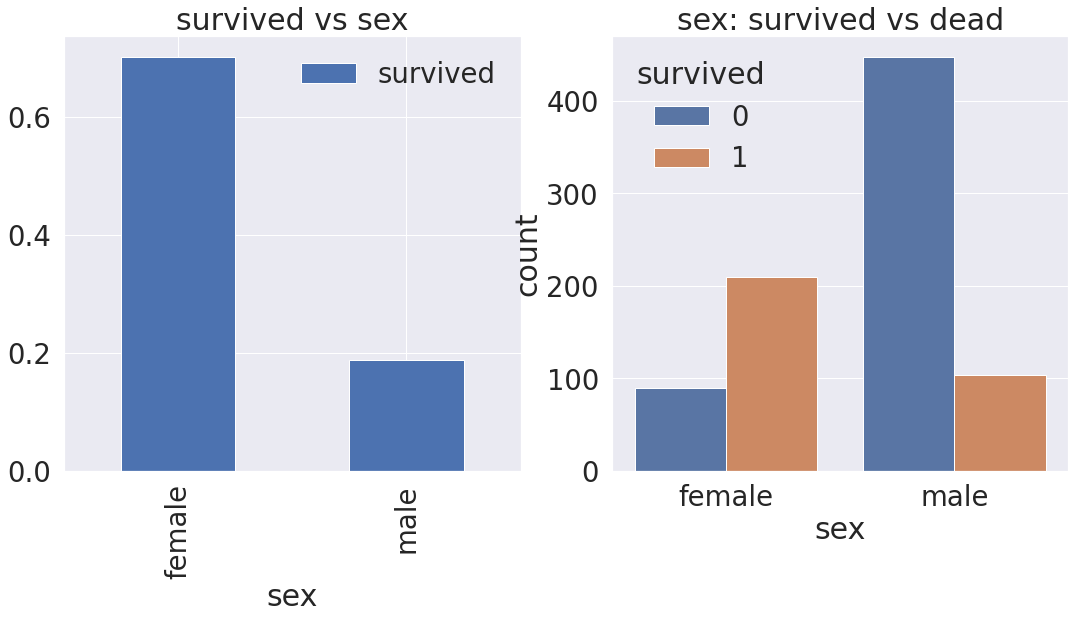

In [21]:
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train[['sex', 'survived']].groupby(['sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('survived vs sex')
sns.countplot('sex', hue='survived', data= df_train, ax=ax[1])
ax[1].set_title('sex: survived vs dead')
plt.show()

In [22]:
df_train[['sex','survived']].groupby(['sex'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sex,survived
0,female,0.702341
1,male,0.186933


In [23]:
pd.crosstab(df_train['sex'], df_train['survived'], margins=True).style.background_gradient(cmap='summer_r')

survived,0,1,All
sex,,,
female,89,210,299
male,448,103,551
All,537,313,850


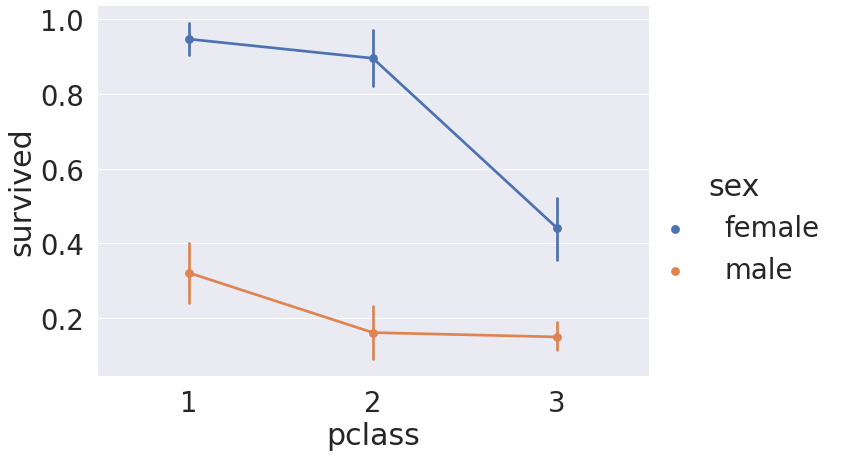

In [24]:
sns.factorplot('pclass','survived',hue='sex', data= df_train, size=6, aspect=1.5)

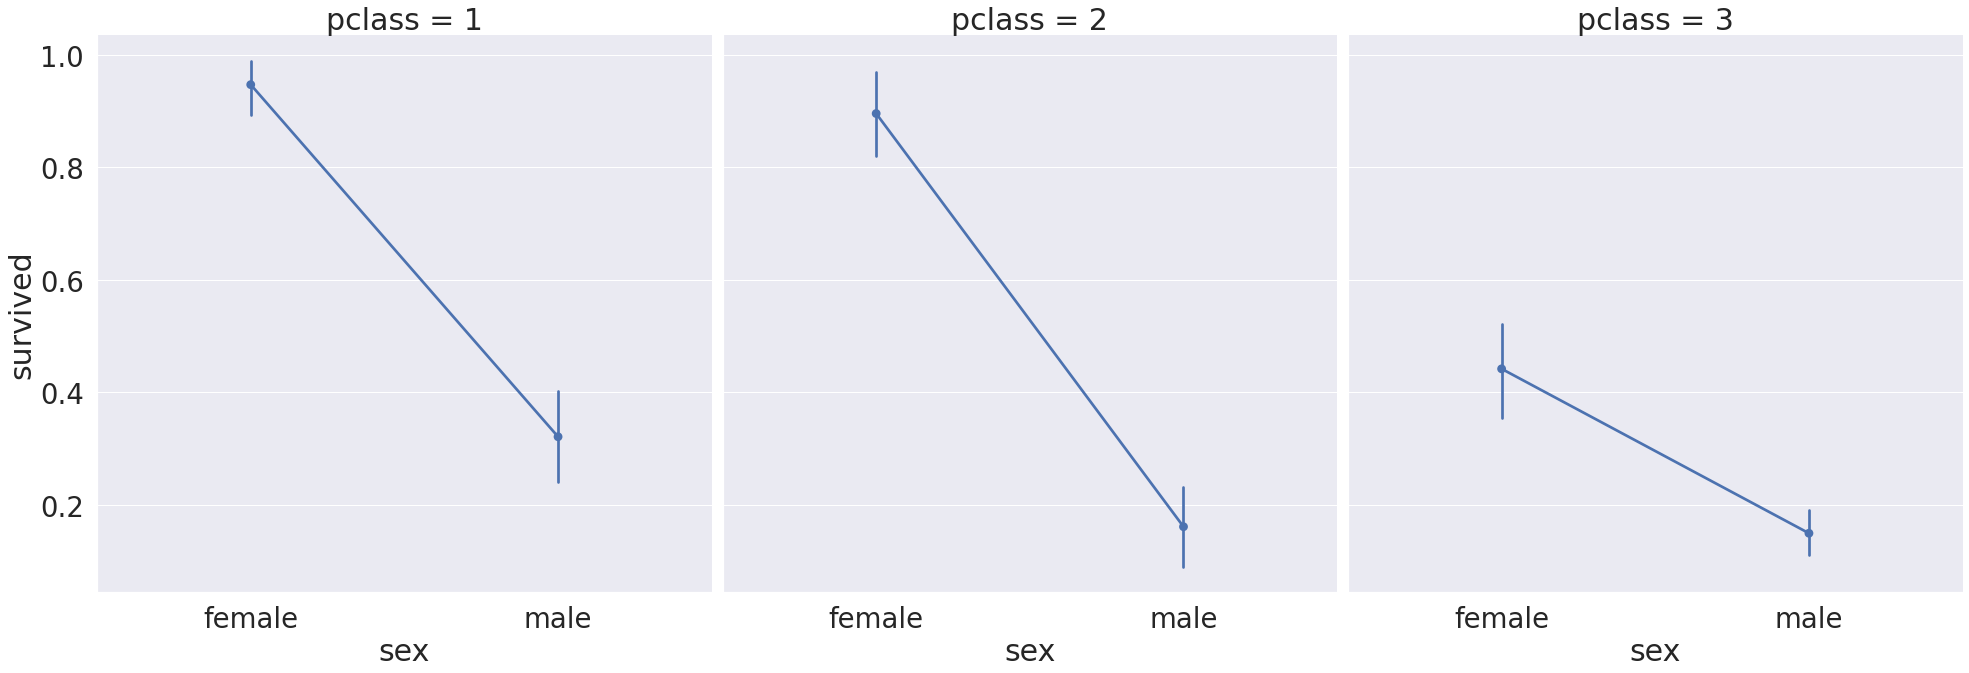

In [25]:
sns.factorplot(x='sex',y='survived',col='pclass',data=df_train, satureation=.5, size=9, aspect=1)

In [26]:
print('제일 나이 많은 탑승객 : {:.1f} Years'. format(df_train['age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['age'].min()))
print('탐승객 평균 나이 : {:.1f} Years'.format(df_train['age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.2 Years
탐승객 평균 나이 : 29.5 Years


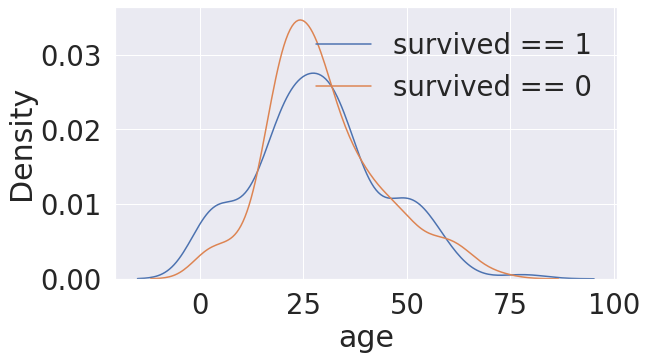

In [27]:
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.kdeplot(df_train[df_train['survived'] ==1 ]['age'], ax=ax)
sns.kdeplot(df_train[df_train['survived'] ==0 ]['age'], ax=ax)
plt.legend(['survived == 1', 'survived == 0'])
plt.show()

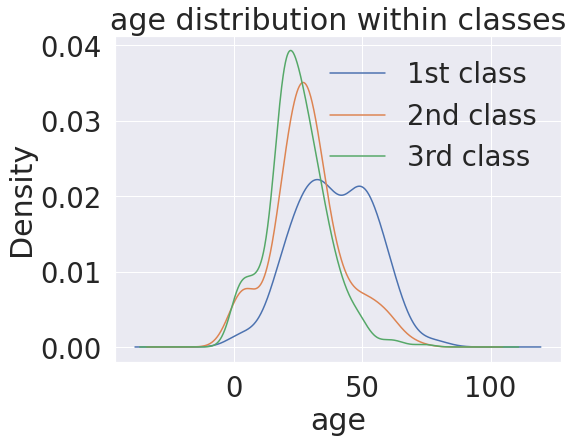

In [28]:
plt.figure(figsize=(8,6))
df_train['age'][df_train['pclass'] == 1].plot(kind='kde')
df_train['age'][df_train['pclass'] == 2].plot(kind='kde')
df_train['age'][df_train['pclass'] == 3].plot(kind='kde')

plt.xlabel('age')
plt.title('age distribution within classes')
plt.legend(['1st class', '2nd class', '3rd class'])

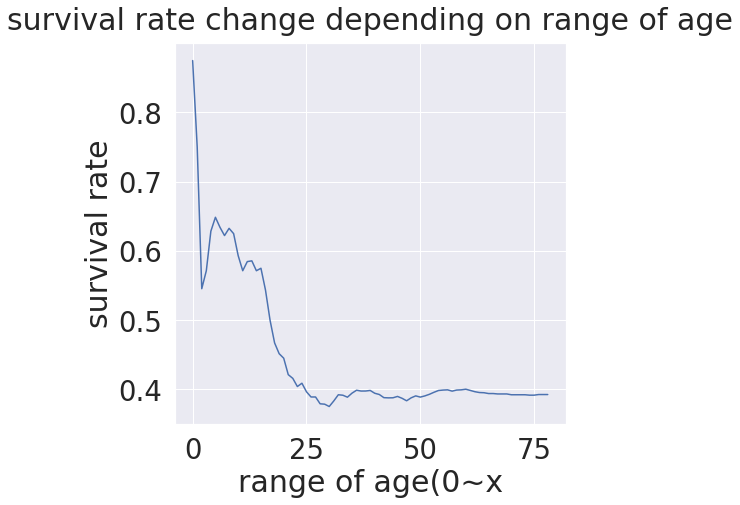

In [29]:
cummulate_survival_ratio = []
for i in range(1, 80):
  cummulate_survival_ratio.append(df_train[df_train['age'] < i]['survived'].sum() / len(df_train[df_train['age'] < i]['survived']))


plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('survival rate change depending on range of age', y=1.02)
plt.ylabel('survival rate')
plt.xlabel('range of age(0~x')
plt.show()

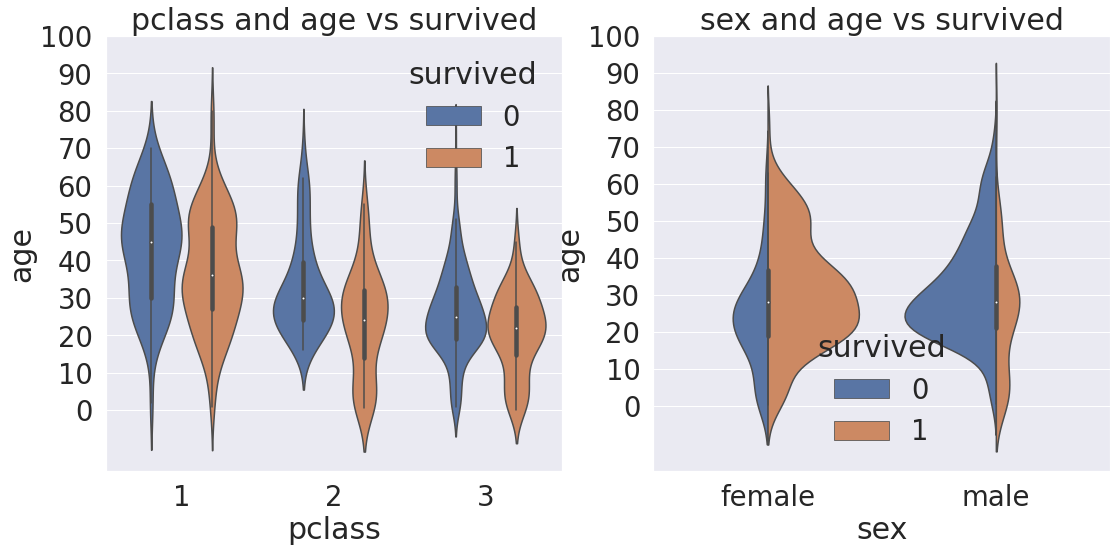

In [30]:
f,ax=plt.subplots(1,2, figsize=(18,8))
sns.violinplot('pclass','age',hue='survived',data=df_train, scalse='count', splot=True, ax=ax[0])
ax[0].set_title('pclass and age vs survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('sex','age', hue='survived', data=df_train, scale='count', split=True,ax=ax[1])
ax[1].set_title('sex and age vs survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

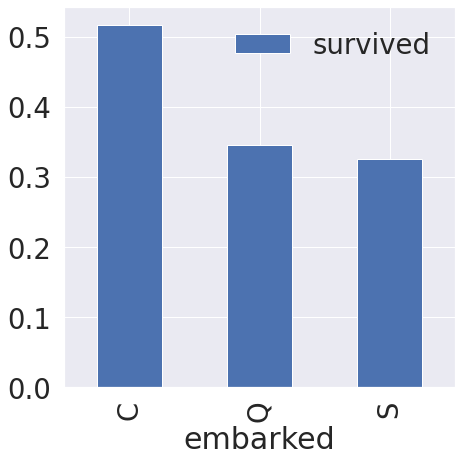

In [31]:
f, ax = plt.subplots(1,1, figsize=(7,7))
df_train[['embarked','survived']].groupby(['embarked'], as_index=True).mean().sort_values(by='survived', ascending=False).plot.bar(ax=ax)


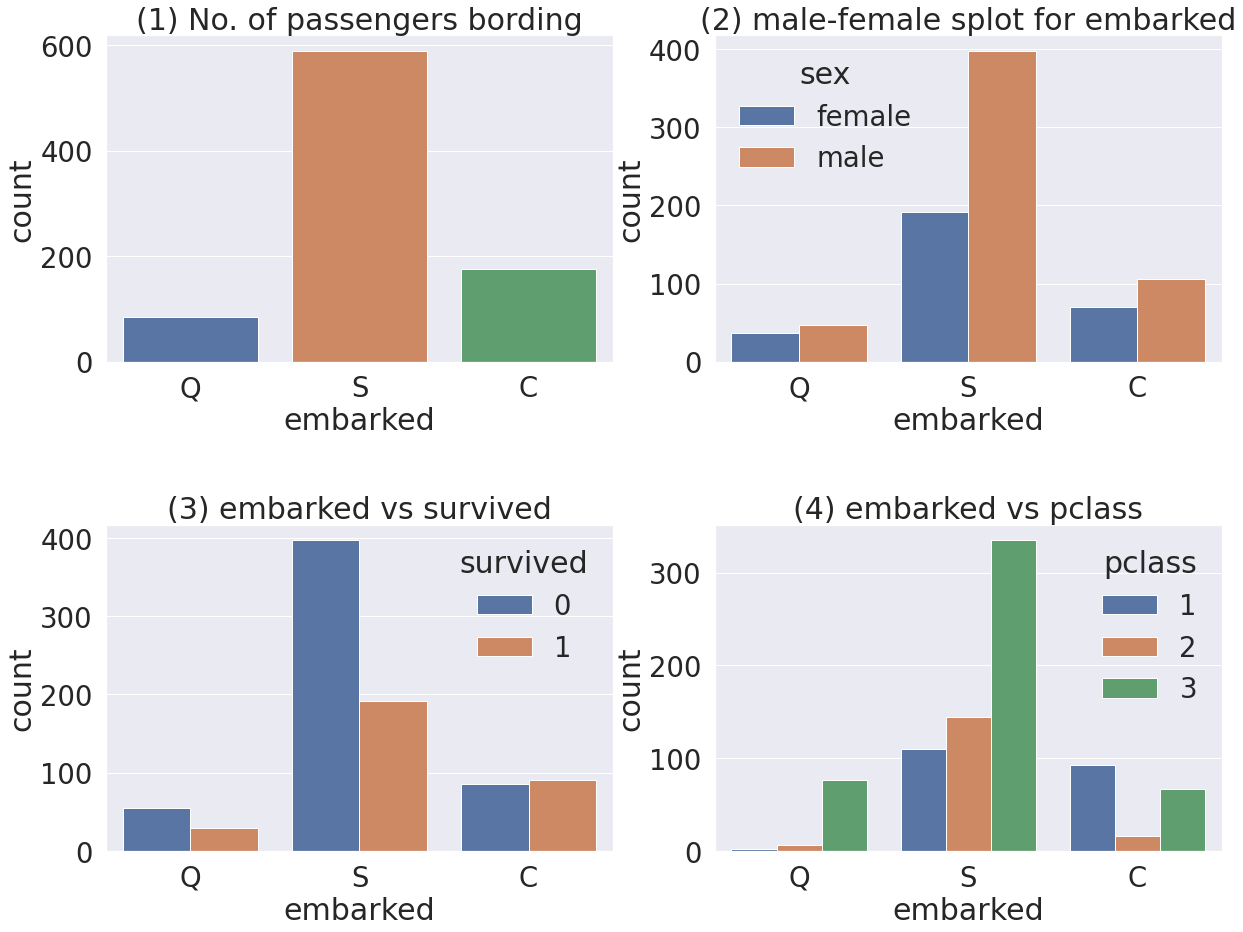

In [32]:
f, ax = plt.subplots(2,2, figsize=(20,15))
sns.countplot('embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. of passengers bording')
sns.countplot('embarked', hue='sex',data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) male-female splot for embarked')
sns.countplot('embarked', hue='survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) embarked vs survived')
sns.countplot('embarked', hue ='pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) embarked vs pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [33]:
df_train['familysize'] = df_train['sibsp'] + df_train['parch'] + 1
df_test['familysize'] = df_test['sibsp'] + df_test['parch'] + 1

In [34]:
print("Maximum size of Family: ", df_train['familysize'].max())
print('Minimum size of Family:', df_train['familysize'].min())

Maximum size of Family:  11
Minimum size of Family: 1


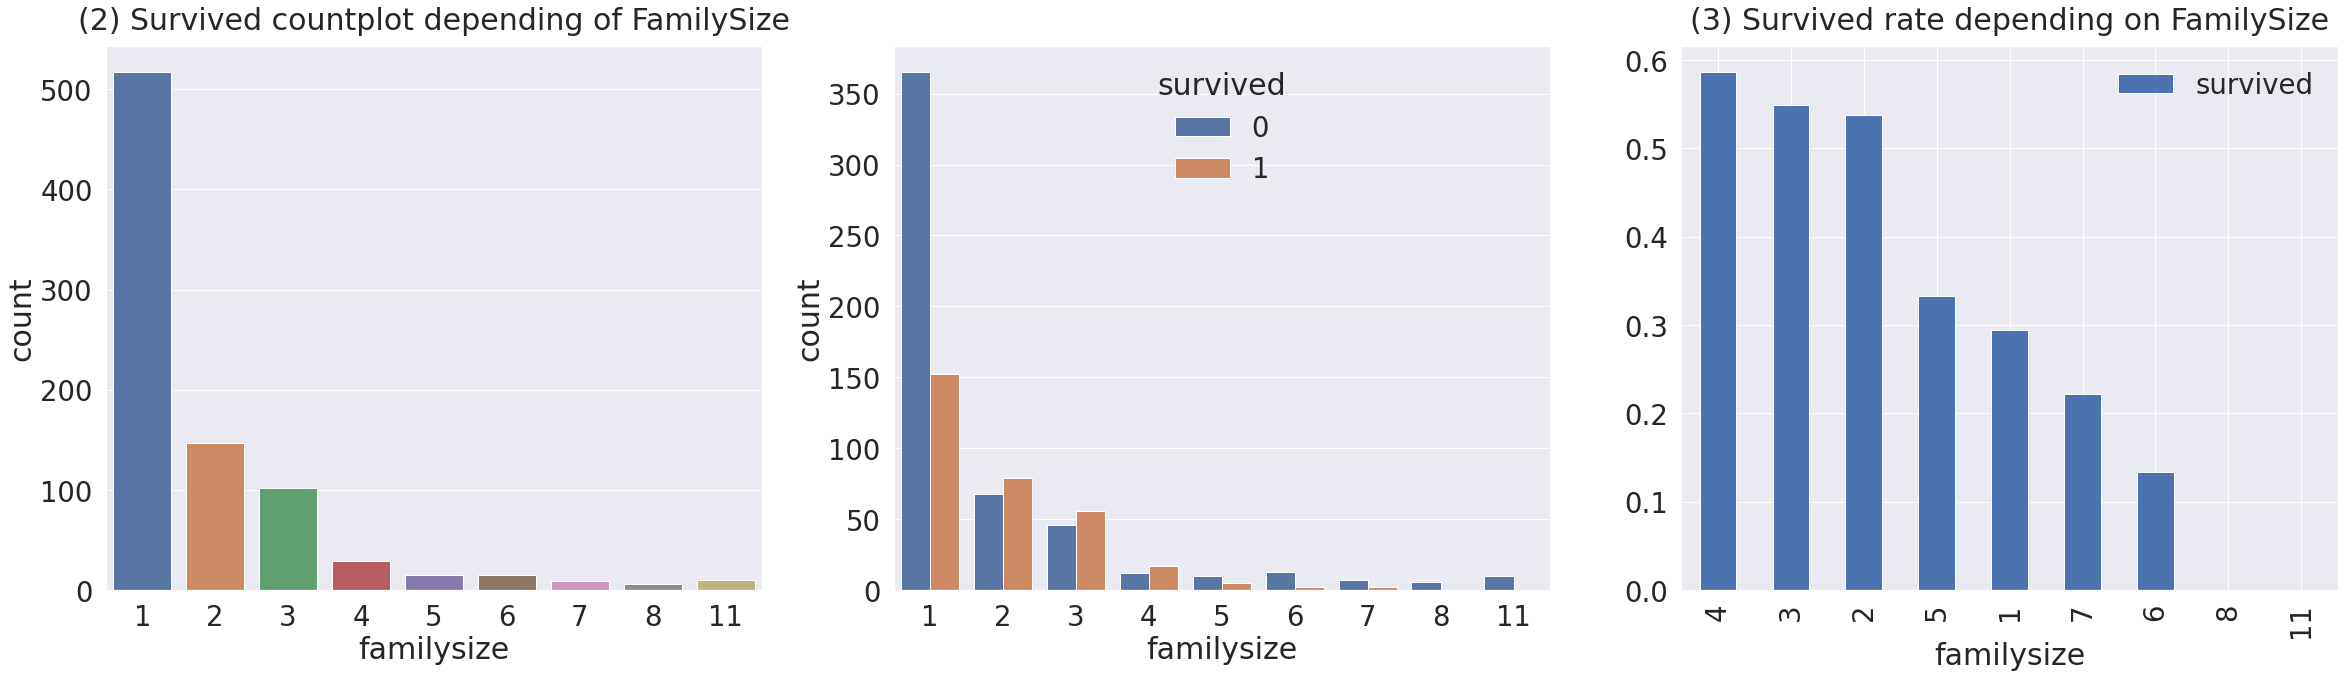

In [36]:
f, ax = plt.subplots(1,3, figsize=(40,10))
sns.countplot('familysize', data=df_train, ax=ax[0])
ax[0].set_title('(1) NO. of Passengers Boarded', y = 1.02)

sns.countplot('familysize', hue='survived', data= df_train, ax=ax[1])
ax[0].set_title('(2) Survived countplot depending of FamilySize' , y =1.02)
df_train[['familysize', 'survived']].groupby(['familysize'], as_index=True).mean().sort_values(by='survived',ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y = 1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

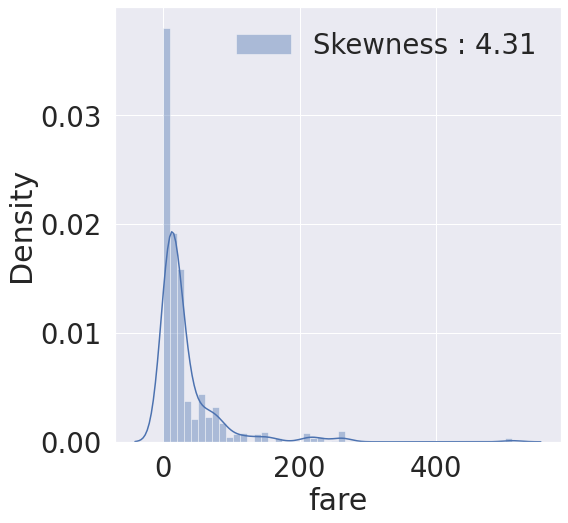

In [37]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(df_train['fare'], color='b', label='Skewness : {:.2f}'.format(df_train['fare'].skew()), ax=ax )
g = g.legend(loc='best')

In [39]:
df_test.loc[df_test.fare.isnull(), 'Fare'] = df_test['fare'].mean()
df_train['fare'] = df_train['fare'].map(lambda i : np.log(i) if i > 0 else 0)
df_test['fare'] = df_test['fare'].map(lambda i : np.log(i) if i > 0 else 0)

TypeError: ignored

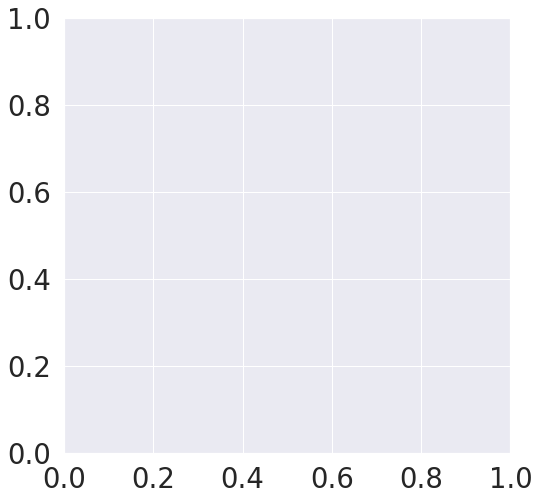

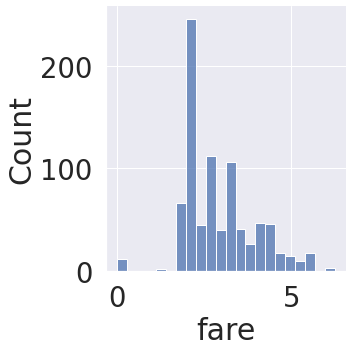

In [40]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.displot(df_train['fare'], color='b', label='Skewness : {:.2f}'.format(df_train['fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [41]:
df_train.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,familysize
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,2.045536,NaN,Q,13,NaN,NaN,1,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,2.159003,NaN,S,NaN,NaN,Croatia,0,1
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,3.184284,NaN,S,NaN,NaN,NaN,0,3
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,3.135494,NaN,S,4,NaN,"Cornwall / Akron, OH",1,5
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,2.564949,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0,1


In [42]:
df_train['ticket'].value_counts()

CA. 2343        10
1601             8
PC 17608         6
S.O.C. 14879     6
CA 2144          6
                ..
2629             1
C.A. 24580       1
F.C.C. 13540     1
W./C. 14258      1
2697             1
Name: ticket, Length: 660, dtype: int64